# Balancing datasets

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


bla


Again, MNIST, more details in the previous notebook

In [2]:
# https://www.openml.org/search?type=data&sort=runs&id=554&status=active
# https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

The nine digits do not occur at the same frequency.

<Axes: >

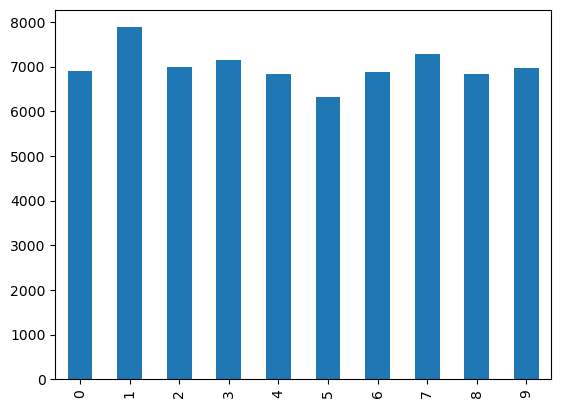

In [3]:
pandas.Series(y).value_counts().sort_index().plot(kind='bar')



Again, lets make this a binary classification problem for simplicity sake.

In [4]:
index_sevens = np.where(y == '7')[0]
index_ones = np.where(y == '1')[0]
print(len(index_ones))
print(len(index_sevens))


7877
7293


## Downsampling
Theres close to 600 more 1's occuring in the dataset than 7's.
Most trivial strategy to balance a dataset if we have enough data is to simply throw away those ~600 1's and were even.

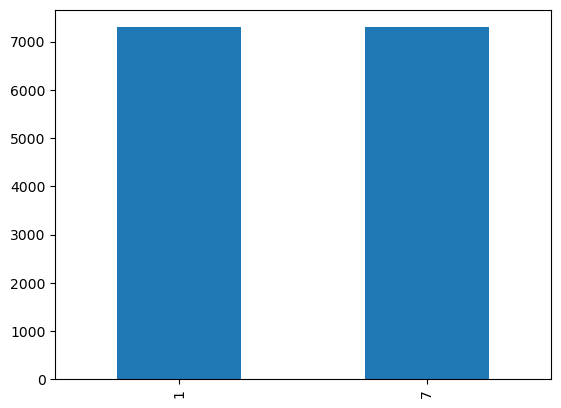

In [5]:
sample_size = min(index_ones.shape[0], index_sevens.shape[0])

Xb = X[np.concatenate((index_sevens[:sample_size], index_ones[:sample_size]))]
yb = y[np.concatenate((index_sevens[:sample_size], index_ones[:sample_size]))]

pandas.Series(yb).value_counts().sort_index().plot(kind='bar')
plt.show()

Lets make another dataset, this time extremely imbalanced bu only having 100 1's to the 7k 7's/

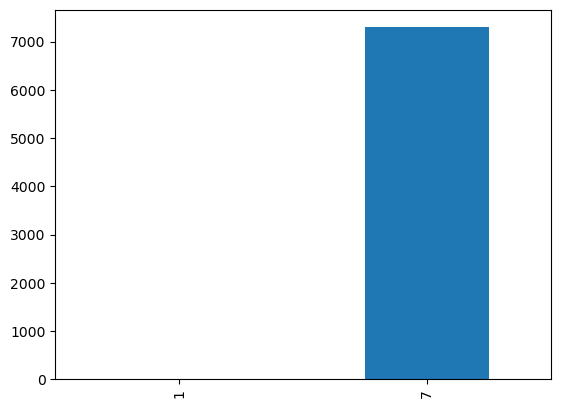

In [9]:
index_ones_sample = np.random.choice(index_ones, size=1)
Xn = X[np.concatenate((index_sevens, index_ones_sample))]
yn = y[np.concatenate((index_sevens, index_ones_sample))]

pandas.Series(yn).value_counts().sort_index().plot(kind='bar')
plt.show()

## Classifier models

First, a model trained and evaluated on a train test split of the balanced dataset.

In [10]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(Xb, yb, test_size=0.25, random_state=42, stratify=yb)
clf_b = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
print(accuracy_score(y_test_b, y_pred_b))

0.9673704414587332


Now, a model trained and evaluated on the imbalanced dataset

In [11]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(Xn, yn, test_size=0.25, random_state=42)
clf_n = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_n.fit(X_train_n, y_train_n)
y_pred_n = clf_n.predict(X_test_n)
print(accuracy_score(y_test_n, y_pred_n))

0.9994517543859649


And now, lets try how the imbalanced model performs if we evaluate it on a balanced test set.

In [12]:
y_pred = clf_n.predict(X_test_b)
print(accuracy_score(y_test_b, y_pred))
print(classification_report(y_test_b, y_pred))


0.6087194954757335
              precision    recall  f1-score   support

           1       1.00      0.22      0.36      1824
           7       0.56      1.00      0.72      1823

    accuracy                           0.61      3647
   macro avg       0.78      0.61      0.54      3647
weighted avg       0.78      0.61      0.54      3647



**Exercise** *: How does the balanced model perform on the imbalanced test set?

In [13]:
y_pred_i = clf_b.predict(X_test_n)
print(accuracy_score(y_test_n, y_pred_i))
print(classification_report(y_test_n, y_pred_i))

0.9654605263157895
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           7       1.00      0.97      0.98      1824

    accuracy                           0.97      1824
   macro avg       0.50      0.48      0.49      1824
weighted avg       1.00      0.97      0.98      1824



/home/banana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/banana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/banana/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Exercise** **: Repeat or modify the experiment above but with more classes (digits) and balance the original dataset.